In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist # 28x28 images of hand-written digits 0-9
(x_train, y_train), (x_test, y_test) = mnist.load_data() 
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3)


Epoch 1/3
1875/1875 [==============================] - 22s 10ms/step - loss: 0.3296 - accuracy: 0.9065
Epoch 2/3
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1232 - accuracy: 0.9632
Epoch 3/3
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0826 - accuracy: 0.9751


In [2]:
val_los, val_acc = model.evaluate(x_test,y_test)
print(val_los, val_acc)

313/313 [==============================] - 4s 9ms/step - loss: 0.0960 - accuracy: 0.9697
0.09597853571176529 0.9696999788284302


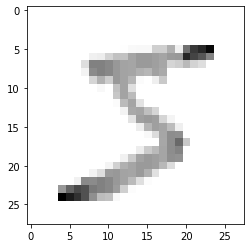

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [3]:
import matplotlib.pyplot  as plt
plt.imshow(x_train[0],cmap = plt.cm.binary)
plt.show()
print(x_train[0])

In [4]:
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [5]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [20]:
predicitions = new_model.predict([x_test])

313/313 [==============================] - 2s 7ms/step


In [13]:
print(predicitions)

[[5.0527447e-11 9.5115399e-07 2.0414177e-09 ... 1.2978549e-15
  2.0694931e-15 4.6157989e-15]
 [9.9973232e-01 1.3035310e-06 1.5248981e-04 ... 1.2066789e-10
  1.9481153e-10 8.2155685e-11]
 [1.5072056e-08 1.2049524e-03 2.0346034e-03 ... 3.9230066e-10
  4.2102249e-10 8.2169266e-10]
 ...
 [2.6465318e-13 3.2368604e-08 9.0336544e-13 ... 7.3948689e-17
  1.4335449e-16 4.9412165e-16]
 [2.7808881e-06 4.0990049e-06 1.4876705e-06 ... 9.0233140e-11
  1.3806026e-09 2.3942776e-10]
 [1.0509883e-06 2.0421257e-07 9.8639121e-06 ... 4.1801316e-11
  1.6683769e-11 2.0812930e-11]]


In [21]:
import numpy as np
print(np.argmax(predicitions[0]))

7


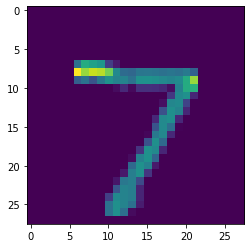

In [22]:
plt.imshow(x_test[0])
plt.show()